#  2017-10-20  Linear and logistic regression



The goal of this lab is to explore linear and logistic regression, implement them yourself and learn to use their respective scikit-learn implementation.

Let us start by loading some of the usual librairies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing, metrics
import sys

%matplotlib inline

# 0. (Vanilla) Gradient descent
To optimise our error while doing linear regression, we will use gradient descent. 

__Reminder about gradient descent:__ This algorithm is commonly used to optimise convex functions. The idea is very simple — to reach the global optimum of a convex function from any point, we need to move in the direction opposite to that of greatest increase of the function. As the function is convex, this strategy will always take us to the global optimum. 

Now, the direction of greatest increase of the function is determined by taking the partial derivatives of the function with respect to every variable. For example, let us say we wish to optimise a convex function $f(x)$, where $x = (x_1, x_2, \ldots, x_d)^T$. Let us say, we start at a point $s \in \mathbb{R}^d$. Then, the direction of greatest increase of $f$ at $s$ is given by 

$$
\nabla f(s) = \left(\frac{\partial f(s)}{\partial x_1}, \frac{\partial f(s)}{\partial x_2}, \ldots ,\frac{\partial f(s)}{\partial x_d} \right)^T.
$$

With this derivative, we design an update rule, which asks us to move in the direction opposite to the direction of greatest increase. By repeatedly applying this rule, we hope to reach the global minimum. We hence move to $t$, which is given by

$$
t = s - \gamma \nabla f(s),
$$
where $\gamma$ is a parameter called the *learning rate*.

We will now construct a class for the gradient descent optimiser. This is a generic class that tries to optimise any function that is given to it.

We shall use the power of Python to declare our class. Python supports *first-class functions*, which allows us to pass functions to and return function from other functions. We shall use this to define the gradient descent optimizer:

__Question:__ Fill in the `GradientDescentOptimizer` class below.

In [3]:
class GradientDescentOptimizer():
    """ Class for optimization by gradient descent.
    
    Attributes:
    -----------
    f: function
        the function to optimize
    fprime: function 
        the gradient of the function to optimize
    beta: np.array
        the point where the function is currently being evaluated
    lr: float
        the learning rate
    fx: float
        the current function value
    fgx: np.array
        the current gradient value
    beta_history: list of np.array
        the list of all points where f has been evaluated
    """
    def __init__(self, f, fprime, start, lr=1e-1):
        """     
        Parameters:
        -----------
        f: function
            the function to optimize 
            Yes, we can pass functions as parameters! To call f within the code, use f followed 
            by its arguments enclosed between parentheses, as you would normally do: f(x)
        fprime: function
            the function's gradient
        start: np.array
            the starting point, at which we begin our search
        lr: float
            the learning rate
        """
        # Store the parameters as attributes
        self.f      = f
        self.fprime = fprime
        self.beta   = start
        self.lr     = lr
        # Save history as attributes
        self.beta_history = [start]
    
    def compute_fprime(self):
        """ Compute the value of the gradient of f for our current point. 
        Update self.fgx accordingly.
        """
        self.fgx = self.fprime(self.beta)
        # Compute the gradient of f for the current parameters. 
        # Simply call fprime on the current values of the parameters.
        # Does not return anything, but simply stores the gradient of f.
        #    in self.fgx.
    
    def step(self):
        """ Take a gradient descent step. 
        Upgrade self.beta accordingly. 
        """
        self.compute_fprime()
        self.beta = self.beta - self.lr*self.fgx
        # Take a gradient descent step.
        # 1. Compute the gradient at the current parameters. 
        # 2. Compute the change in beta from this gradient.
        # 3. Update self.beta appropriately using the learning rate.
        # Does not return anything.
        # TODO

        
    def optimize(self, max_iter=100):
        """Use the gradient descent optimiser to optimise f.
        Update self.f_history and self.beta_history accordingly.
        
        Parameters:
        -----------
        max_iter: int
            Maximum number of iterations.        
        """
        i=0
        while i <= max_iter:
            self.step()
            #print(self.beta)
            self.beta_history.append(self.beta)
            i+=1
    
        # Use the gradient descent optimiser to optimise f.
        # 1. In every iteration, take a gradient descent step.
        # 2. Update self.beta_history.
        # Does not return anything.
        # TODO
            
    def print_result(self):
        """ Print out result once optimization is complete.        
        """
        sys.stdout.write(" === Result ===\n")
        sys.stdout.write("Best beta found: " + str(self.beta) +'\n')
        sys.stdout.write("f(best beta) = " + str(self.f(self.beta)) + '\n')
        sys.stdout.write("f\'(best beta) = " + str(self.fprime(self.beta)) + '\n')

Let us try to optimise a simple function with this optimizer. Define a function $f(x) = \left(x - \begin{pmatrix}5 \\ 4\end{pmatrix}\right)^2$. Note that the input to $f$ is a vector of size 2. 

__Question:__ Fill in the functions below.

In [4]:
def f(x):
    return (x-np.array([5,4])).dot(x-np.array([5,4]))
    # TODO

Now define another function which is the gradient of $f$ at a point $x$. 

In [5]:
def fprime(x):
    return 2*x-np.array([10,8])
    # TODO

Now check that f and fprime do what you want them to do:

In [6]:
print(f(np.array([5,0])))
print(fprime(np.array([5,0])))

16
[ 0 -8]


Now initialise a `GradientDescentOptimizer` using this function and its gradient. Run the optimise by calling `.optimize()`. Also, call `gd.print_result()` to see how the optimisation turned out.

In [7]:
gd = GradientDescentOptimizer(f, fprime, start=np.random.normal(size=(2,), loc=0.0, scale=1.0), lr=1e-1)
gd.optimize()
gd.print_result()
# TODO


 === Result ===
Best beta found: [ 5.  4.]
f(best beta) = 1.61426385941e-18
f'(best beta) = [ -1.71981185e-09  -1.87064231e-09]


Plot the progression of the value of `f` and see how it goes.
Plot also the norm of the gradient at each point (Hint: use the `beta_history` parameter)

(102,)
(102,)


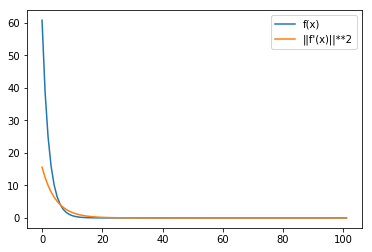

In [8]:
plt.figure()
f = [gd.f(i) for i in gd.beta_history]
g = [np.linalg.norm(gd.fprime(i)) for i in gd.beta_history]
print(np.shape(f))
print(np.shape(g))
f1, = plt.plot(f,label='f(x)')
g1, = plt.plot(g,label='||f\'(x)||**2')
plt.legend(handles=[f1,g1])

# 1. Linear regression

We will now implement a linear regression, first using the closed form solution, and second with our gradient descent.

## 1.1 Linear regression data

Our first data set regards the quality ratings of a white _vinho verde_. Each wine is described by a number of physico-chemical descriptors such as acidity, sulfur dioxide content, density or pH.

In [9]:
# load the regression task data
wine_data = pd.read_csv('data/winequality-white.csv', sep=";")
wine_data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [13]:
# Load the data into X and y data arrays
X_regr = wine_data.drop(['quality'], axis=1).values
y_regr = wine_data['quality'].values
print(min(y_regr))
print(np.shape(y_regr))
# Standardize the data
sc = preprocessing.StandardScaler()
sc.fit(X_regr)
X_regr = sc.transform(X_regr)

3
(4898,)


## 1.2 Cross-validation

Let us create a cross-validation utility function (similar to what we have done in Lab 3, but for regression).

In [28]:
# set up folds for cross_validation
from sklearn import cross_validation
folds_regr = cross_validation.KFold(y_regr.size, n_folds=10, shuffle=True)

In [29]:
def cross_validate_regr(design_matrix, labels, regressor, cv_folds):
    """ Perform a cross-validation and returns the predictions.
    
    Parameters:
    -----------
    design_matrix: (n_samples, n_features) np.array
        Design matrix for the experiment.
    labels: (n_samples, ) np.array
        Vector of labels.
    regressor:  Regressor instance; must have the following methods:
        - fit(X, y) to train the regressor on the data X, y
        - predict(X) to apply the trained regressor to the data X and return estimates 
    cv_folds: sklearn cross-validation object
        Cross-validation iterator.
        
    Returns:
    -------
    pred: (n_samples, ) np.array
        Vectors of predictions (same order as labels).
    """
    pred = np.zeros(labels.shape)
    for tr, te in cv_folds:
        regressor.fit(design_matrix[tr,:], labels[tr])
        pred[te] = (regressor.predict(design_matrix[te,:]))
    return pred

## 1.3 Linear regression implementation

### Closed-form solution

For an input vector $X^T = (X_1 , X_2 , \dots , X_p )$, and a real-valued output Y, the linear regression model
has the form $$f(X) = \beta_0 + \sum_{j=1}^pX_j\beta_j$$
We consider a set of training data $(x_1 , y_1 ) \dots (x_N , y_N )$ from which to estimate the parameters $\beta$.

The most popular estimation method is least squares, in which the coefficients $\beta = (\beta_0 , \beta_1 , \dots , \beta_p )^T$ minimize the residual sum of squares $$ RSS(\beta) = \sum_{i=1}^N(y_i-f(x_i))^2 = (y-X\beta)^T(y-X\beta)$$

The problem is convex.

Differentiating with respect to $\beta$ we obtain $$\frac{\partial{RSS}}{\partial{\beta}} = -2X^T(y-X\beta) $$

If X^TX is inversible, we obtain a unique solution by setting the first derivative to 0.
$$\hat{\beta} = (X^TX)^{-1}X^Ty$$

** Remark ** It might happen that the columns of X are not linearly independent (in the case for example of two perfectly correlated inputs). Then $X^TX$ is singular and the least squares coefficients $\hat{\beta}$ are not uniquely defined.
This can be avoid by dropping redundant columns in X.

__Question:__ Fill in the LeastSquareRegr class below.

In [30]:
class LeastSquaresRegr():
    """ Class for least-squares linear regression:
    
    Attributes:
    -----------
    coef_: 1-dimensional np.array
        coefficients of the linear regression (beta)
    """
    def __init__(self,):
        self.coef_ = None
        
    def fit(self, X, y):
        """ Fit the data (X, y).
    
        Parameters:
        -----------
        X: (num_samples, num_features) np.array
            Design matrix
        y: (num_sampes, ) np.array
            Output vector
        
        Note:
        -----
        Updates self.coef_
        """
        
        # Create a (num_samples, num_features+1) np.array X_aug whose first column 
        # is a column of all ones (so as to fit an intercept).
        # TODO
        X_aug = np.insert(X,0,np.ones(np.shape(X)[0]),axis=1)
        # Update self.coef_
        # TODO
        self.coef_ = np.linalg.pinv(X_aug.T.dot(X_aug)).dot(X_aug.T).dot(y)
        
    def predict(self, X):
        """ Make predictions for data X.
    
        Parameters:
        -----------
        X: (num_samples, num_features) np.array
            Design matrix
        
        Returns:
        -----
        y_pred: (num_samples, ) np.array
            Predictions
        """
        # TODO
        X_aug = np.insert(X,0,np.ones(np.shape(X)[0]),axis=1)
        return X_aug.dot(self.coef_)

Let us now evaluate your least squares regression on the data:

In [31]:
regr = LeastSquaresRegr()
pred = cross_validate_regr(X_regr, y_regr, regr, folds_regr)
print("Mean squared error: %.3f" % metrics.mean_squared_error(y_regr,pred))

Mean squared error: 0.568


### Gradient descent solution

Processing the entire dataset in one go can be computationally costly for large datasets. In addition, a small change in the training set involves computing the new parameters from scratch. In both cases, it may be worthwhile to use sequential algorithms in which the datapoints are considered one at a time and the model parameters updated at each time. 

We will create a sequential version of our least squares regressor, using gradient descent. 

__Question:__ Fill in the blanks.

__Hints:__ You can use [np.reshape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html) to cast a 1-dimensional np.array `V` of shape `(n,)` as a 2-dimensional np.array of shape `(n, 1)` using `np.reshape(V, [-1,1])`.

In [32]:
class seq_LeastSquaresRegr():
    """ Class for sequential least-squares linear regression:
    
    Attributes:
    -----------
    coef_: 1-dimensional np.array
        coefficients of the linear regression (beta)
    """
    def __init__(self):
        self.coef_ = None
        
    def fit(self, X, y):
        """ Fit the data (X, y).
    
        Parameters:
        -----------
        X: (num_samples, num_features) np.array
            Design matrix
        y: (num_sampes, ) np.array
            Output vector
        
        Note:
        -----
        Updates self.coef_
        """
        # Create a (num_samples, num_features+1) np.array X_aug whose first column 
        #    is a column of all ones (for beta_0). The rest of the columns are taken
        #    from X.
        # TODO
        #print(np.shape(X))
        X_aug = np.insert(X,0,np.ones(np.shape(X)[0]),axis=1)
        #print(np.shape(X_aug))
        # Initialize self.coef_ at random, with shape (num_features+1,)
        # TODO
        self.coef_ = np.random.random(np.shape(X)[1]+1)
        #print(np.shape(self.coef_))
        def f_ls(beta):
            """ Returns the least square error between y and X.beta.        
            """
            # TODO
            return (y-X_aug.dot(beta)).T.dot(y-X_aug.dot(beta))

        
        def fprime_ls(beta):
            """ Returns the gradient of f_ls at beta.
            IMPORTANT:  The output should have the same shape as beta,
            otherwise our optimiser will not work.
            """
            # TODO
            f = -2*X_aug.T.dot(y-X_aug.dot(beta))
            #print(np.shape(f))
            #np.reshape(f,[-1,1])
            return f
        
        # Use gradient descent optimization to minimize the least squares error.
        gd = GradientDescentOptimizer(f_ls, fprime_ls, self.coef_, lr=1e-5)
        gd.optimize(max_iter=1000)
        
        # Update self.coef_
        # You must retrieve gd.beta after the optimisation is complete, and store it in
        #    self.coef_.
        # TODO
        self.coef_ = gd.beta
        #print(self.coef_)
        
    def predict(self, X):
        """ Make predictions for data X.
    
        Parameters:
        -----------
        X: (num_samples, num_features) np.array
            Design matrix
        
        Returns:
        -----
        y_pred: (num_samples, ) np.array
            Predictions
        """
        X_aug = np.insert(X,0,np.ones(np.shape(X)[0]),axis=1)
        pre = X_aug.dot(self.coef_)
        #print(pre)
        return pre
        # Do not forget to appropriately augment the data matrix!
        # Also, do not forget the convention - the first column is all ones, while
        #    the rest of the columns are taken from X.
        # TODO

Let us now evaluate your sequential least squares regression on the data:

In [33]:
regr = seq_LeastSquaresRegr()
pred = cross_validate_regr(X_regr, y_regr, regr, folds_regr)
print("Mean squared error: %.3f" % metrics.mean_squared_error(y_regr, pred))

Mean squared error: 0.567


** Question ** Discuss the difference of errors between the two implementations.

__Answer__ If the learning rate is too high the gradient descent diverges, and if the learning rate is low enough the model converges to the global minimum, so the difference is not that great


### scikit-learn implementation

We will now compare to the scikit-learn implementation.

__Question__ Cross-validate scikit-learn's [linear_model.LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) on your data.

In [34]:
from sklearn import linear_model

# Initialize a LinearRegression model
regr = linear_model.LinearRegression()

# Cross-validate it
pred = cross_validate_regr(X_regr, y_regr, regr, folds_regr)
print("Mean squared error: %.3f" % metrics.mean_squared_error(y_regr, pred))

Mean squared error: 0.568


# 2. Logistic regression

We will now implement a linear regression, first using the closed form solution, and second with our gradient descent.

## 2.1 Logistic regression data

Our second data set comes from the world of bioinformatics. In this data set, each observation is a tumor, and it is described by the expression of 3,000 genes. The expression of a gene is a measure of how much of that gene is present in the biological sample. Because this affects how much of the protein this gene codes for is produced, and because proteins dictacte what cells can do, gene expression gives us valuable information about the tumor. In particular, the expression of the same gene in the same individual is different in different tissues (although the DNA is the same): this is why blood cells look different from skin cells. In our data set, there are two types of tumors: breast tumors and ovary tumors. Let us see if gene expression can be used to separate them!

In [35]:
# Load the classification task data
breast_data = pd.read_csv('data/small_Breast_Ovary.csv',
                        index_col=0 # first column = sample id ('ID_REF')
                       )
#print(breast_data.head(5))
# Drop the 'Tissue' column to create the design matrix
X_clf = np.array(breast_data.drop(['Tissue'], axis=1).values)

# Use the 'Tissue' column to create the labels (0=Breast, 1=Ovary)
y_clf = np.array(breast_data['Tissue'].values)
y_clf[np.where(y_clf == 'Breast')] = 0
y_clf[np.where(y_clf == 'Ovary')] = 1
y_clf = y_clf.astype(np.int)

#sc = preprocessing.StandardScaler()
#sc.fit(X_clf)
#X_clf = sc.transform(X_clf)

__Question:__ How many samples do we have? How many belong to each class? How many features do we have?

In [36]:
# TODO
print(np.shape(X_clf))
print(np.shape(y_clf))

(542, 3000)
(542,)


## 2.2 Cross-validation

Let us create a cross-validation utility function (similar to what we have done in Lab 3).

In [37]:
# Set up folds for cross_validation
from sklearn import cross_validation
folds_clf = cross_validation.StratifiedKFold(y_clf, n_folds=10, shuffle=True)

In [38]:
def cross_validate_clf(design_matrix, labels, classifier, cv_folds):
    """ Perform a cross-validation and returns the predictions.
    
    Parameters:
    -----------
    design_matrix: (n_samples, n_features) np.array
        Design matrix for the experiment.
    labels: (n_samples, ) np.array
        Vector of labels.
    classifier:  sklearn classifier object
        Classifier instance; must have the following methods:
        - fit(X, y) to train the classifier on the data X, y
        - predict_proba(X) to apply the trained classifier to the data X and return probability estimates 
    cv_folds: sklearn cross-validation object
        Cross-validation iterator.
        
    Return:
    -------
    pred: (n_samples, ) np.array
        Vectors of predictions (same order as labels).
    """
    #print(labels.shape)
    pred = np.zeros(labels.shape)
    for tr, te in cv_folds:
        classifier.fit(design_matrix[tr,:], labels[tr])
        pred[te] = classifier.predict_proba(design_matrix[te,:])[:,1]
        
    return pred

## 2.3 Logistic regression implementation

Under the assumption of linear boundaries segragating classes, the posterior probability of class $C_1$ can be written as a logistic sigmoid acting on a linear function of the feature vector X so that $p(C_1|X) = \sigma(\beta^TX)$.

For an input vector $X^T = (X_1 , X_2 , \dots , X_p )$, and a binary output Y such that $y_i\in\{0,1\}$, the likelihood function is
$$ p(y\vert\beta) = \prod_{i=0}^Np(y_i\vert\beta) = \prod_{i=0}^Np(C_1\vert X)^{y_i}(1-p(C_1\vert X))^{1-y_i} = \prod_{i=0}^N\sigma(\beta^TX)^{y_i}(1-\sigma(\beta^TX))^{1-y_i}.$$

We can then define (as usual) an error function to minimize by taking the negative logarithm of the likelihood
$$ E_{loss}(\beta) = -\log(p(y|\beta)) = -\sum_{i=0}^N\{ y_i\log(\sigma(\beta^Tx_i)) + (1-y_i)\log(1-\sigma(\beta^Tx_i)) \} = \sum_{i=0}^N\log(e^{-y_i*x_i^T\beta}+1)$$

Then it's derivative can be written $$\nabla E(\beta) = \sum_{i=1}^N(\sigma(x_i^T\beta)-y_i)x_i.$$

__Question:__ Now that you know how to write the loss function for logistic regression, `f(beta)`, and what its derivative `f'(beta)` is in terms of `beta`, use the previously defined `GradientDescentOptimizer` to fit a logistic regression model to our data `(X, y)`. Some of the code below has already been filled to help you. 

**Remark:** The derivative of logistic function $\sigma(x)=\frac{1}{1+e^{-x}}$ can be written $\text{d}\sigma = \sigma (1-\sigma)$.

In [1]:
from sklearn import metrics
import numpy as np

In [2]:
def sigmoid(x):
    """ Sigmoid function.
    
    Parameters:
    -----------
    x: np.array
        input variables
        
    Returns:
    -------
    r: np.array of same dimension as x
        outputs
    """
    # Truncate the very large and very small values of x to avoid overflowing the exponential.
    x[np.where(x > 7e2)] = 7e2
    x[np.where(x < -7e2)] = -7e2
    
    # Compute the sigmoid
    r = 1. / (1 + np.exp(-1*x))
    return r

In [41]:
class LogisticRegr():
    """ Class for sequential least-squares linear regression:
    
    Attributes:
    -----------
    coef_: 1-dimensional np.array
        coefficients of the linear regression (beta)
    classes: list
        list of class labels
    """
    def __init__(self,):
        self.coef_ = None
        self.classes_ = [0,1]
        
    def fit(self, X, y):
        """ Fit the data (X, y).
    
        Parameters:
        -----------
        X: (num_samples, num_features) np.array
            Design matrix
        y: (num_sampes, ) np.array
            Output vector
        
        Note:
        -----
        Updates self.coef_
        """
        # Create a (num_samples, num_features+1) np.array X_aug whose first column 
        #    is a column of all ones (for beta_0), while the remaining columns are 
        #    taken from X.
        # TODO
        X_aug = np.insert(X,0,np.ones(np.shape(X)[0]),axis=1)
        # Initialize self.coef_ at random, with the right shape
        # TODO
        self.coef_ = np.random.random(np.shape(X_aug)[1])
        # Find the indices which correspond to class 0
        c0_ids = np.where(y == 0)[0] 
        # Find the indices which correspond to class 1. 
        c1_ids = np.where(y == 1)[0]
        # TODO
            
        def f_lr(beta):            
            """ 
            Returns the logistic loss between y and X.beta.        
            """
            # Reshape beta as a two-dimensional array with second dimension equal to 1
            beta  = beta.reshape([-1,1])
            # TODO
            
            # Compute phi_0, the model's prediction for class 0 samples
            phi_0 = np.log(np.e**(y[c0_ids]*X_aug[c0_ids,:].dot(beta))+1)
            
            # TODO
            
            # Compute phi_1, the model's prediction for class 1 samples
            phi_1 = np.log(np.e**(y[c1_ids]*X_aug[c1_ids,:].dot(beta))+1)
            
            # TODO
            
            # Compute the loss over class 1 samples
            loss = np.sum(phi_1)
            
            # TODO
            # Update the loss with the loss over class 0 samples
            loss = loss + np.sum(phi_0)
            return loss
        
        def fprime_lr(beta):   
            """ Returns the gradient of f_ls at beta.
            IMPORTANT:  The output should have the same shape as beta,
            otherwise our optimiser will not work!
            """
            # TODO
            return np.sum(np.reshape((sigmoid(X_aug.dot(beta))-y),[-1,1])*X_aug,axis=0)
        
        # Now optimize the loss over the data:
        # Use GradientDescentOptmizer to update self.coef_
        # TODO
        gd = GradientDescentOptimizer(f_lr, fprime_lr, self.coef_, lr=1e-5)
        gd.optimize(max_iter=100)
        
        # Update self.coef_
        # You must retrieve gd.beta after the optimisation is complete, and store it in
        #    self.coef_.
        # TODO
        self.coef_ = gd.beta
        
    def predict_proba(self, X):
        """ Make probabilistic predictions for data X.
    
        Parameters:
        -----------
        X: (num_samples, num_features) np.array
            Design matrix
        
        Returns:
        -----
        y_pred: (num_samples, ) np.array
            Predictions (probabilities of belonging to class 1)
        """
        # IMPORTANT: Do not forget to augment the data matrix X in the same
        #    fashion as you did for the fit method.
        # TODO
        X_aug = np.insert(X,0,np.ones(np.shape(X)[0]),axis=1)
        pred = sigmoid(X_aug.dot(self.coef_))
        pred_aug = np.insert(pred.reshape([-1,1]),0,1-pred,axis=1)
        return pred_aug
        
    
    def predict(self, X):
        return 1
        """ Make binary predictions for data X.
    
        Parameters:
        -----------
        X: (num_samples, num_features) np.array
            Design matrix
        
        Returns:
        -----
        y_pred: (num_samples, ) np.array
            Predictions (0 or 1)
        """
        # TODO

Let us now evaluate your logistic regression on the data:

In [51]:
clf = LogisticRegr()
pred = cross_validate_clf(X_clf, y_clf, clf, folds_clf)
print("Accuracy: %.3f" % metrics.recall_score(y_clf, pred > 0.5))
print(pred)

Accuracy: 0.929
[  9.85967654e-305   9.85967654e-305   9.85967654e-305   9.85967654e-305
   1.00000000e+000   9.85967654e-305   9.85967654e-305   9.85967654e-305
   9.85967654e-305   9.85967654e-305   9.85967654e-305   9.85967654e-305
   9.85967654e-305   9.85967654e-305   1.00000000e+000   9.85967654e-305
   9.85967654e-305   9.85967654e-305   9.85967654e-305   9.85967654e-305
   1.00000000e+000   9.85967654e-305   9.85967654e-305   1.00000000e+000
   9.85967654e-305   9.85967654e-305   9.85967654e-305   9.85967654e-305
   1.00000000e+000   9.85967654e-305   9.85967654e-305   9.85967654e-305
   9.85967654e-305   1.00000000e+000   9.85967654e-305   1.00000000e+000
   1.00000000e+000   9.85967654e-305   1.00000000e+000   1.00000000e+000
   1.00000000e+000   1.00000000e+000   1.00000000e+000   1.00000000e+000
   1.00000000e+000   1.00000000e+000   1.00000000e+000   1.00000000e+000
   1.00000000e+000   1.00000000e+000   1.00000000e+000   1.00000000e+000
   1.00000000e+000   1.00000000e+00

### scikit-learn implementation

We will now compare to the scikit-learn implementation.

__Question__ Cross-validate scikit-learn's [linear_model.LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) on your data.

In [50]:
from sklearn import linear_model

# Initialize a LogisticRegression model. 
# Use C=1e7 to ensure there is no regularization (we'll talk about regularization next time!)
clf = linear_model.LogisticRegression(C=1e7)

# Cross-validate it
ypred_logreg = cross_validate_clf(X_clf, y_clf, clf, folds_clf)
#print(ypred_logreg)
print("Accuracy: %.3f" % metrics.recall_score(y_clf,np.where(ypred_logreg > 0.5,1,0)))

Accuracy: 0.934


** Question : ** Plot the ROC curve. Use plt.semilogx to use a logarithmic scale on the x-axis. This "spreads out" the curve a little, making it easier to read.

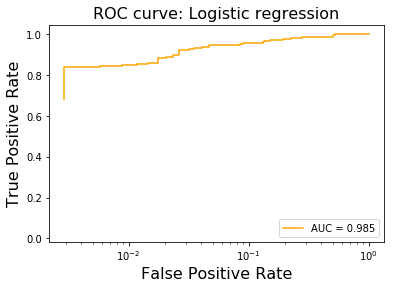

In [44]:
fpr_logreg, tpr_logreg, thresholds = metrics.roc_curve(y_clf,ypred_logreg)
auc_logreg = metrics.roc_auc_score(y_clf,ypred_logreg)

plt.semilogx(fpr_logreg, tpr_logreg, '-', color='orange', 
             label='AUC = %0.3f' % auc_logreg)

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve: Logistic regression', fontsize=16)
plt.legend(loc="lower right")

### Data scaling
See [preprocessing.StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

**Question** Scale the data, and compute the cross-validated predictions of the logistic regression on the scaled data.

In [45]:
from sklearn import preprocessing

# Scale the data with preprocessing.StandardScaler
# Initialize a scaler
scaler = preprocessing.StandardScaler()
# Scale your design matrix
X_clf_scaled = scaler.fit_transform(X_clf)

# Initialize a LogisticRegression model. 
# Use C=1e7 to ensure there is no regularization (we'll talk about regularization next time!)
clf = linear_model.LogisticRegression(C=1e7)

# Cross-validate it for the scaled data
ypred_logreg_scaled = cross_validate_clf(X_clf_scaled, y_clf, clf, folds_clf)

print("Accuracy: %.3f" % metrics.accuracy_score(y_clf,ypred_logreg_scaled > 0.5))

Accuracy: 0.959


**Question** Plot the two ROC curves (one for the logistic regression on the original data, one for the logistic regression on the scaled data) on the same plot.

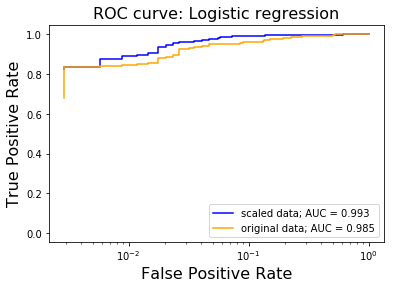

In [46]:
fpr_logreg_scaled, tpr_logreg_scaled, thresholds = metrics.roc_curve(y_clf,ypred_logreg_scaled)
auc_logreg_scaled = metrics.roc_auc_score(y_clf,ypred_logreg_scaled)

plt.semilogx(fpr_logreg_scaled, tpr_logreg_scaled, '-', color='blue', 
             label='scaled data; AUC = %0.3f' % auc_logreg_scaled)
plt.semilogx(fpr_logreg, tpr_logreg, '-', color='orange', 
             label='original data; AUC = %0.3f' % auc_logreg)

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve: Logistic regression', fontsize=16)
plt.legend(loc="lower right")

In a cross-validation setting, we ignore the samples from the test fold when training the classifier. This also means that scaling should be done on the training data only. 

In scikit-learn, we can use a scaler to make centering and scaling happen independently on each feature by computing the relevant statistics on the samples *in the training set*. 
The mean and standard deviation will be stored to be used on the test data.

**Question** Rewrite the cross_validate method to include a scaling step.

In [47]:
def cross_validate_clf_with_scaling(design_matrix, labels, classifier, cv_folds):
    """ Perform a cross-validation and returns the predictions.
    
    Parameters:
    -----------
    design_matrix: (n_samples, n_features) np.array
        Design matrix for the experiment.
    labels: (n_samples, ) np.array
        Vector of labels.
    classifier:  sklearn classifier object
        Classifier instance; must have the following methods:
        - fit(X, y) to train the classifier on the data X, y
        - predict_proba(X) to apply the trained classifier to the data X and return probability estimates 
    cv_folds: sklearn cross-validation object
        Cross-validation iterator.
        
    Return:
    -------
    pred: (n_samples, ) np.array
        Vectors of predictions (same order as labels).
    """
    pred = np.zeros(labels.shape)
    scaler = preprocessing.StandardScaler()
    for tr, te in cv_folds:
        scaler.fit(design_matrix[tr,:])
        tr_data_scaled = scaler.transform(design_matrix[tr,:])
        classifier.fit(tr_data_scaled, labels[tr])
        pred[te] = classifier.predict_proba(scaler.transform(design_matrix[te,:]))[:,1]
    return pred

**Question** Now use the cross_validate_with_scaling method to cross-validate the logistic regression on our data.

In [48]:
clf = linear_model.LogisticRegression(C=1e6) 
ypred_logreg_scaled_ = cross_validate_clf_with_scaling(X_clf, y_clf, clf, folds_clf)
print(metrics.accuracy_score(y_clf,np.where(ypred_logreg_scaled_ > 0.5, 1, 0)))

0.964944649446


**Question** Again, compare the AUROC and ROC curves with those obtained previously. What do you conclude?

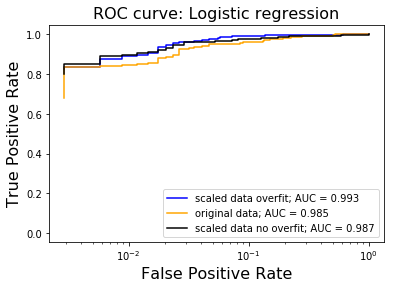

In [49]:
fpr_logreg_scaled_, tpr_logreg_scaled_, thresholds = metrics.roc_curve(y_clf,ypred_logreg_scaled_)
auc_logreg_scaled_ = metrics.roc_auc_score(y_clf,ypred_logreg_scaled_)

plt.semilogx(fpr_logreg_scaled, tpr_logreg_scaled, '-', 
             color='blue', label='scaled data overfit; AUC = %0.3f' % auc_logreg_scaled)
plt.semilogx(fpr_logreg, tpr_logreg, '-', color='orange', 
             label='original data; AUC = %0.3f' % auc_logreg)
plt.semilogx(fpr_logreg_scaled_, tpr_logreg_scaled_, '-', color='black', 
             label='scaled data no overfit; AUC = %0.3f' % auc_logreg_scaled_)


plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve: Logistic regression', fontsize=16)
plt.legend(loc="lower right")

>>>Thus the non-overfitted data has the least AUC but the highest accuracy score.

# 3. Kaggle challenge ideas

* Load the data
* Set up a cross-validation that you will use for all your evaluations. Notice there is a 'random_state' parameter to the cross-validation methods of scikit-learn, that you can use to ensure you always get the same splits.
* To go one step further in ensuring a fair comparison of your algorithms, you can use multiple repeats of the cross-validation procedure (using different splits each time), and report the mean & standard deviation over the repeats of the performance obtained. If you do this, you can report standard deviations in plots by using error bars.
* Evaluate the performance of a linear regression on your data. Which evaluation metric are you using? See http://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics for help defining one.
* Submit a linear regression predictor to the leaderboard.